In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path_to_data="D:\\Animals"
path_to_cr_data="D:\\Animals\\cropped" #new folder


In [3]:
def cropped(image_path):#to create duplicate folder for operation
    img=cv2.imread(image_path)
    return img

In [4]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['D:\\Animals\\black',
 'D:\\Animals\\Deer',
 'D:\\Animals\\Elephant',
 'D:\\Animals\\grizzly',
 'D:\\Animals\\Lion',
 'D:\\Animals\\panda',
 'D:\\Animals\\polar',
 'D:\\Animals\\Tiger']

In [5]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [7]:
cropped_img_dirs=[]
count=0
rangers_file_names_dict={}
for img_dir in img_dirs:
    l1=[]
    rangers_name=img_dir.split("\\")[-1]
    print(rangers_name)
    for entry in os.scandir(img_dir):
        roi_color=cropped(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+"\\"+rangers_name
            print(cropped_folder)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print(" Generating : ",cropped_folder)
                cropped_img_dirs.append(cropped_folder)
            cropped_file_name=rangers_name+str(count)+".png"
            cropped_file_path=cropped_folder+"\\"+cropped_file_name
            l1.append(cropped_file_path)
            
            cv2.imwrite(cropped_file_path,roi_color)
            count+=1
            
            
    rangers_file_names_dict[rangers_name]=l1
            
print(rangers_file_names_dict)

black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\black
D:\Animals\cropped\

D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropped\Lion
D:\Animals\cropp

In [46]:
#wavelet transform
import pywt
import cv2
import numpy as np


def w2d(img,mode='haar',level=1):
    
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    imArray=np.float32(imArray)
    imArray/=255
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H


    

In [47]:
class_dict={}
count=0
for name in rangers_file_names_dict.items():
    class_dict[name[0]]=count
    count+=1
class_dict

{'Lion': 0, 'Tiger': 1}

In [48]:
x=[]
y=[]



for rangers_name,training_files in rangers_file_names_dict.items():
    for img in training_files:
        img=cv2.imread(img)
        if img is None:
            continue
        scaling=cv2.resize(img,(32,32))
        img_wavelet=w2d(img,'db1',5)
        scaled_img_wavelet=cv2.resize(img_wavelet,(32,32))
        combined=np.vstack((scaling.reshape(32*32*3,1),scaled_img_wavelet.reshape(32*32,1)))
        x.append(combined)
        y.append(class_dict[rangers_name])

len(x)
        
        

157

In [49]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape


(157, 4096)

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.725

In [52]:
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [54]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.743841,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.727899,{'randomforestclassifier__n_estimators': 30}
2,logistic_regression,0.743841,{'logisticregression__C': 1}


In [55]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.675

In [56]:
best_estimators['svm'].score(x_test,y_test)

0.625

In [57]:
best_estimators['random_forest'].score(x_test,y_test)

0.6

In [2]:
!pip install tensorflow_hub

In [65]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [66]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_075_224/classification/5",input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [73]:
data_dir="D:\\Animals"

In [74]:
import pathlib

In [75]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Animals')

In [76]:
list(data_dir.glob('*/*.jpg'))[:2]

[WindowsPath('D:/Animals/black/black1.jpg'),
 WindowsPath('D:/Animals/black/black10.jpg')]

In [77]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

626


In [78]:
lion=list(data_dir.glob('lion/*'))
lion[:10]

[WindowsPath('D:/Animals/lion/l1.jpg'),
 WindowsPath('D:/Animals/lion/l10.jpg'),
 WindowsPath('D:/Animals/lion/l11.jpg'),
 WindowsPath('D:/Animals/lion/l12.jpg'),
 WindowsPath('D:/Animals/lion/l13.jpg'),
 WindowsPath('D:/Animals/lion/l14.jpg'),
 WindowsPath('D:/Animals/lion/l15.jpg'),
 WindowsPath('D:/Animals/lion/l16.jpg'),
 WindowsPath('D:/Animals/lion/l17.jpg'),
 WindowsPath('D:/Animals/lion/l18.jpg')]

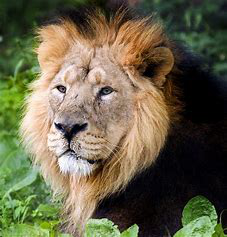

In [79]:
Image.open(str(lion[3]))

In [87]:
animals_images_dict={
    'lion':list(data_dir.glob('lion/*')),
    'tiger':list(data_dir.glob('tiger/*')),
    'Black Bear':list(data_dir.glob('black/*')),
    'Grizzly Bear':list(data_dir.glob('grizzly/*')),
    'Panda':list(data_dir.glob('panda/*')),
    'Polar Bear':list(data_dir.glob('polar/*')),
    'Deer':list(data_dir.glob('Deer/*')),
    'Elephant':list(data_dir.glob('Elephant/*'))
}

In [81]:
animals_images_dict['lion']

[WindowsPath('D:/Animals/lion/l1.jpg'),
 WindowsPath('D:/Animals/lion/l10.jpg'),
 WindowsPath('D:/Animals/lion/l11.jpg'),
 WindowsPath('D:/Animals/lion/l12.jpg'),
 WindowsPath('D:/Animals/lion/l13.jpg'),
 WindowsPath('D:/Animals/lion/l14.jpg'),
 WindowsPath('D:/Animals/lion/l15.jpg'),
 WindowsPath('D:/Animals/lion/l16.jpg'),
 WindowsPath('D:/Animals/lion/l17.jpg'),
 WindowsPath('D:/Animals/lion/l18.jpg'),
 WindowsPath('D:/Animals/lion/l19.jpg'),
 WindowsPath('D:/Animals/lion/l2.jpg'),
 WindowsPath('D:/Animals/lion/l20.jpg'),
 WindowsPath('D:/Animals/lion/l21.jpg'),
 WindowsPath('D:/Animals/lion/l22.jpg'),
 WindowsPath('D:/Animals/lion/l23.jpg'),
 WindowsPath('D:/Animals/lion/l24.jpg'),
 WindowsPath('D:/Animals/lion/l25.jpg'),
 WindowsPath('D:/Animals/lion/l26.jpg'),
 WindowsPath('D:/Animals/lion/l27.jpg'),
 WindowsPath('D:/Animals/lion/l28.jpg'),
 WindowsPath('D:/Animals/lion/l29.jpg'),
 WindowsPath('D:/Animals/lion/l3.jpg'),
 WindowsPath('D:/Animals/lion/l30.jpg'),
 WindowsPath('D:/An

In [82]:
animals_labels_dict={
    'lion':0,
    'tiger':1,
    'Black Bear':2,
    'Grizzly Bear':3,
    'Panda':4,
    'Polar Bear':5,
    'Deer':6,
    'Elephant':7
    
}

In [89]:
img=str(animals_images_dict['lion'][0])

In [90]:
img=cv2.imread(img)
img.shape

(235, 308, 3)

In [91]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [92]:
x,y=[],[]

for animal_name,images in animals_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,IMAGE_SHAPE)
        x.append(resized_img)
        y.append(animals_labels_dict[animal_name])

In [93]:
x=np.array(x)
y=np.array(y)

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [95]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

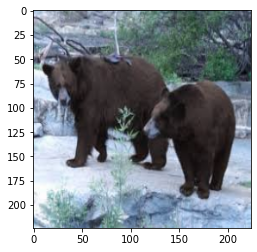

In [96]:
plt.imshow(x[200])

In [97]:
predicted=classifier.predict(np.array([x[0],x[1],x[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 1s 670ms/step


array([905, 905, 905], dtype=int64)

In [98]:
feature_extraction_model= "https://tfhub.dev/google/imagenet/mobilenet_v2_075_224/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extraction_model,input_shape=(224,224,3),trainable=False
)

In [99]:
num_of_animals=8

model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_animals)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1280)              1382064   
                                                                 
 dense_3 (Dense)             (None, 8)                 10248     
                                                                 
Total params: 1,392,312
Trainable params: 10,248
Non-trainable params: 1,382,064
_________________________________________________________________


In [100]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
15/15 [==============================] - 13s 563ms/step - loss: 1.2939 - acc: 0.5842
Epoch 2/5
15/15 [==============================] - 9s 572ms/step - loss: 0.3419 - acc: 0.9510
Epoch 3/5
15/15 [==============================] - 9s 568ms/step - loss: 0.1565 - acc: 0.9893
Epoch 4/5
15/15 [==============================] - 9s 581ms/step - loss: 0.0956 - acc: 0.9915
Epoch 5/5
15/15 [==============================] - 8s 560ms/step - loss: 0.0670 - acc: 0.9979


In [101]:
model.evaluate(x_test_scaled,y_test)

5/5 [==============================] - 4s 649ms/step - loss: 0.1817 - acc: 0.9490


[0.18171770870685577, 0.9490445852279663]

1/1 [==============================] - 1s 514ms/step
[[-3.8249128 -2.8465302 -3.6648793 -4.3161287 -2.9344683 -4.3413825
   3.5934563 -2.331459 ]]
Deer


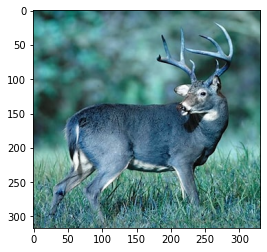

In [102]:
x=[]
img=cv2.imread("D:\\deer.jpg")
plt.imshow(img)
scaling=cv2.resize(img,IMAGE_SHAPE)
x=scaling/255






ans=model.predict(np.array([x]))
print(ans)
predicted=np.argmax(ans,axis=1)
predicted

for i in animals_labels_dict:
    if(predicted==animals_labels_dict[i]):
        print(i)



In [3]:
import serial
path='D:\\signals.py'
open(path).readline() 

'import serial\n'